# 數據介紹
   ## IRIS 鳶尾花

以Iris dataset為例，鳶尾花資料集是非常著名的生物資訊資料集之一，取自美國加州大學歐文分校的機器學習資料庫http://archive.ics.uci.edu/ml/datasets/Iris，資料的筆數為150筆，共有五個欄位：

花萼長度(Sepal Length)：計算單位是公分。 花萼寬度(Sepal Width)：計算單位是公分。 花瓣長度(Petal Length) ：計算單位是公分。 花瓣寬度(Petal Width)：計算單位是公分。 類別(Class)：可分為Setosa，Versicolor和Virginica三個品種。

透過花瓣以及花萼的長與寬來預測是屬於哪一種類的Iris花(Setosa, Virginica, Versicolour)，因為特徵數目不多，只有四個，並且類別項目只有三個，因此對於初學者來說非常好理解。若要載入Iris 資料集只要import sklearn的datasets之後，使用load_iris()就可以獲得資料，回傳的資料格式為dictionary，因此需要做一些資料處理才能變為表格的形式，在python只要有關表格的處理主要都使用pandas為主。

#  數據導入

In [123]:
#導入函式庫
import pandas
import pandas as pd  
from sklearn import datasets
import seaborn as sns
from pandas.tools.plotting import scatter_matrix #导入散点图矩阵包
import matplotlib.pyplot as plt  
from sklearn import model_selection  #模型比较和选择包
from sklearn.metrics import classification_report  #将主要分类指标以文本输出
from sklearn.metrics import confusion_matrix #计算混淆矩阵，主要来评估分类的准确性
from sklearn.metrics import accuracy_score #计算精度得分
from sklearn.linear_model import LogisticRegression #线性模型中的逻辑回归
from sklearn.tree import DecisionTreeClassifier #树算法中的决策树分类包
from sklearn.neighbors import KNeighborsClassifier #导入最近邻算法中的KNN最近邻分类包
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #判别分析算法中的线性判别分析包
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯中的高斯朴素贝叶斯包
from sklearn.svm import SVC  #支持向量机算法中的支持向量分类包

In [124]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names) #读取csv数据
data =datasets.load_iris() #原始數據
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#  數據解析成表格

In [125]:
iris = pd.DataFrame(data["data"], columns=data["feature_names"]) #解析標準格式
iris["target"] = data["target"]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


由以上數據的描述性統計可知 150個樣本值跟5個變量(屬性)

# 數據描述性統計

In [126]:
 #先對數據（樣本量、變數個數等）進行大概了解
    
print(dataset.shape)
#输出结果为：(150, 5)，即该数据有150个样本值以及5个变量（属性）

(150, 5)


In [127]:
# head
print(dataset.head( )) #查看數據本身內容前五組 

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# 屬性描述統計

In [128]:
dataset.info() #整體輪廓資料內容


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


## 4個属性的樣本值、平均值、標準誤差、最小值、25%分位数、中位数、75%分位数、最大值。

In [129]:
dataset.describe() 

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
print(dataset.groupby('class').size())  #三類的樣本各有50個

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 數據可視化


 ## 單變量圖

### 箱型圖 直方圖

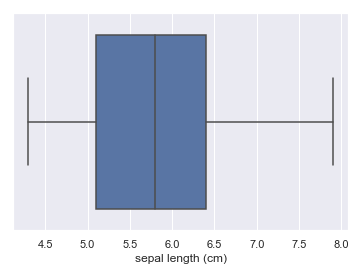

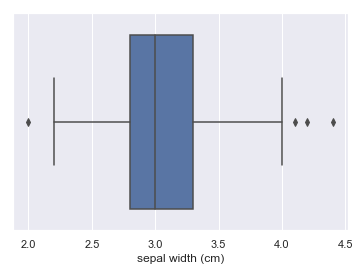

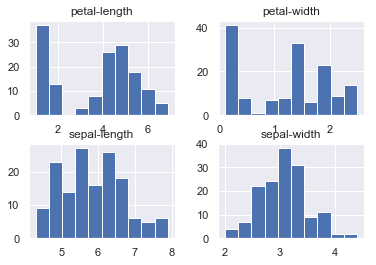

In [130]:

#比如數據中的SepalLengthCm屬性
sns.boxplot(x="sepal length (cm)", data=iris)
plt.show()

#比如數據中的SepalWidthCm屬性
sns.boxplot(x="sepal width (cm)", data=iris)
#直方圖
dataset.hist()
plt.show()

## 多變量圖
    ### 散點圖矩陣，這有助於發現變量之間的結搆化關系，在這里特別要注意觀察兩變量間（變量對）基於對角線的關系，這表明變量之間的相關性與可預測關系（散點圖代表了兩變量的相關程度，如果呈現出沿着對角線分布的趨勢，說明它們的相關性較高）。

### 花萼長度寬度及花瓣長度寬度關係圖

In [131]:
import matplotlib.pyplot as plt
#初始化
sns.set()

Text(0.5,1,' patal Length and patal width analysize')

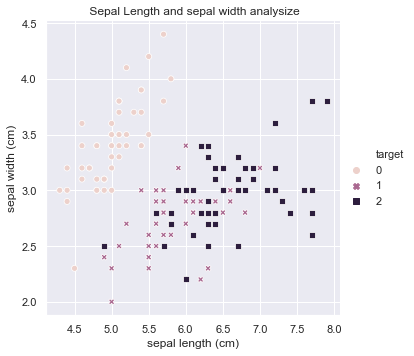

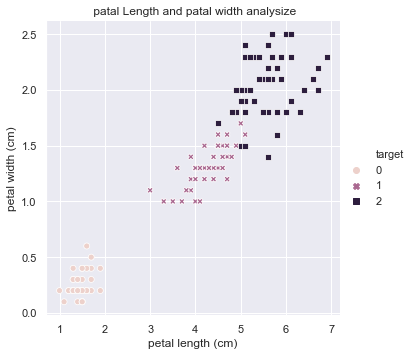

In [132]:
#設置離散點 x,y軸,hue 表示對target 數據做分類 style 表示每個類別標籤不一致 ,data參數  
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", style="target",data=iris)#花萼長度跟寬度比較
#設置標題
plt.title(' Sepal Length and sepal width analysize')

sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", style="target",data=iris)  #花瓣長度和寬度比較
plt.title(' patal Length and patal width analysize')

結論:(上圖)可以看到setosa這種花的花萼長度和寬度有明顯的線性關係, 當然其他兩種也存在一定的關係¶
      (下圖)花的品種和花瓣的長度, 寬度之間存在一定的關係

###  還可以對比花萼與花瓣的長度, 花萼與花瓣的寬度之間的關係

Text(0.5,1,' Sepal width and petal width analysize')

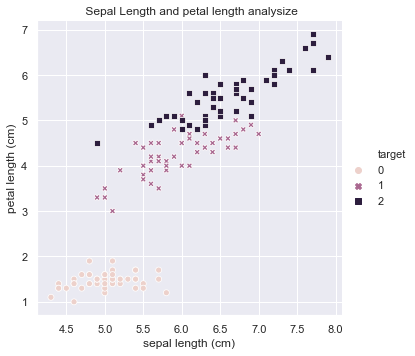

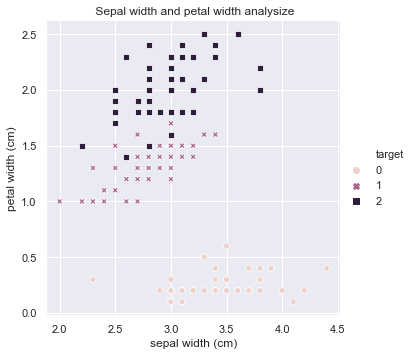

In [134]:
#花萼與花瓣長度分佈散點圖
sns.relplot(x="sepal length (cm)", y="petal length (cm)", hue="target", style="target",data=iris)
plt.title(' Sepal Length and petal length analysize')
#花萼與花瓣寬度分佈散點圖
sns.relplot(x="sepal width (cm)", y="petal width (cm)", hue="target", style="target",data=iris)
plt.title(' Sepal width and petal width analysize')

### 花萼的長度與花瓣的寬度, 花萼的寬度與花瓣的長度之間應當也存在某種關係:

Text(0.5,1,' Sepal width and petal length analysize')

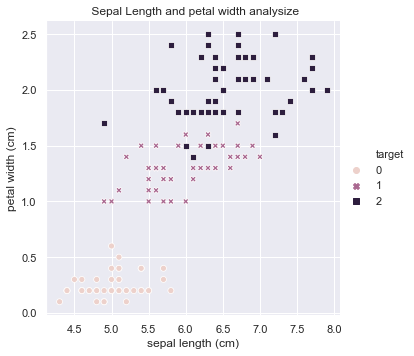

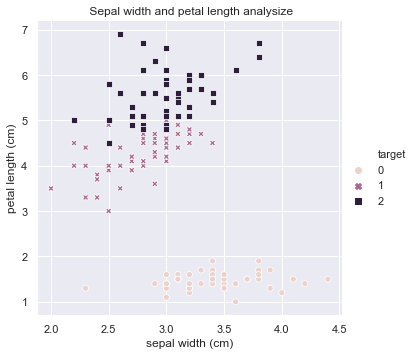

In [135]:
#花萼的長度與花瓣的寬度分佈散點圖

sns.relplot(x="sepal length (cm)", y="petal width (cm)", hue="target", style="target",data=iris)
plt.title(' Sepal Length and petal width analysize')

#花萼的寬度與花瓣的長度分佈散點圖

sns.relplot(x="sepal width (cm)", y="petal length (cm)", hue="target", style="target",data=iris)
plt.title(' Sepal width and petal length analysize')


### jointplot 散點圖和直方圖同時顯示, 可以直觀地看出哪組頻率數最大, 哪組頻率數最小

C:\Users\strive72\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


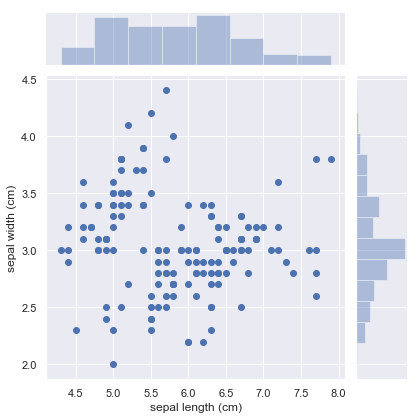

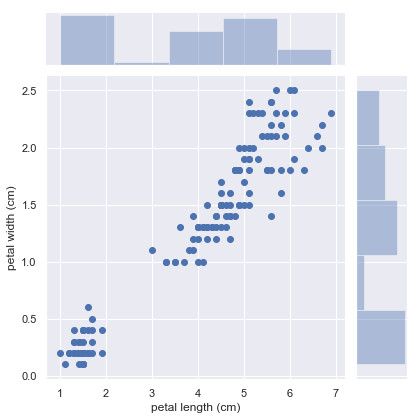

In [136]:

sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris)
sns.jointplot(x="petal length (cm)", y="petal width (cm)", data=iris)

C:\Users\strive72\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\strive72\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\strive72\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\strive72\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


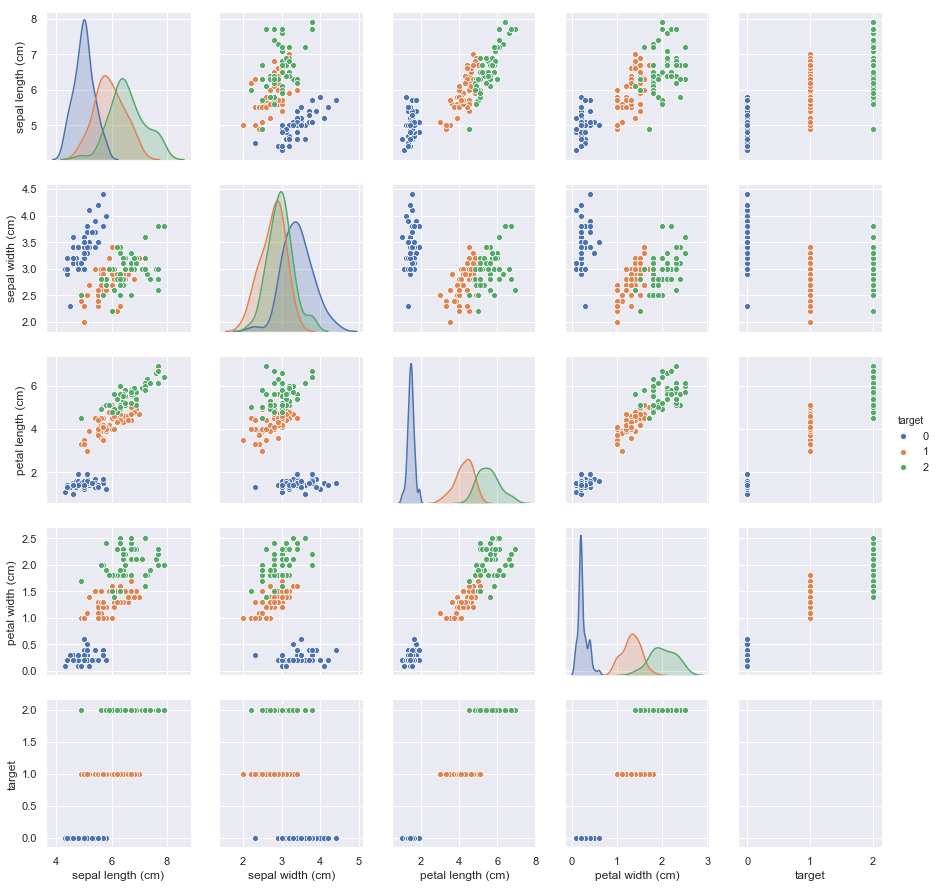

In [91]:
sns.pairplot(hue="target", data=iris.iloc[:, 0:])
#pairplot 兩兩項目自動畫圖

# 依上面圖形觀察出來有分群的趨勢,選擇用SVM 做機器學習 

In [145]:
from sklearn.svm import SVC, LinearSVC
X = iris.iloc[:, 0:4].values
y = iris["target"].values
model = LinearSVC(random_state=555)
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

# Mean accuracy 看 model 準確率

In [146]:
model.score(X=X, y=y)

0.9666666666666667

# #模型好壞的判定

In [ ]:
 一開始資料選定 資料的清洗  到最後模型選擇 跟機器學習導入的訓練結果都影響評分
    大概要0.99才能算是一個可以正式上線的模型
    

In [152]:
from sklearn import metrics
predict_y = model.predict(X=X)
confmat = metrics.confusion_matrix(y, predict_y)
confmat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

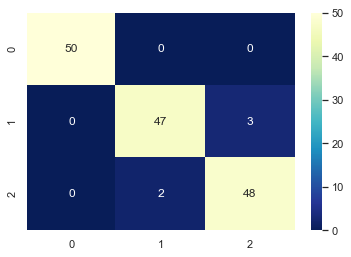

In [153]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

## 從Confusion matrix混淆矩陣來看¶
class=0 50/50 全數 答對正確
class=1 47/50      有 3 個錯誤
class=2 48/50      有 2 個錯誤
# 最終來看分類總結報告 Classification report

In [154]:
report = metrics.classification_report(y, predict_y)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150



## class=0 precision & recall & f1-score 全數=1       表示正確率百分百
## class=1 precision 預測準確率=0.96 
##                                recall回測正確率=0.94 總和f1-score=0.95¶
## class=2 precision 預測準確率=0.94 
##                                recall回測正確率=0.96 總和f1-score=0.95

# 創新解法1

## 創新:把花萼長寬相減的平方跟花瓣長寬相減的平方來觀察¶

將原iris dataset 轉換成 column為 sepal Square of two-digit subtraction(花蕊長寬相減的平方) petal Square of two-digit subtraction(花瓣長寬相減的平方) class(分類結果) 新的 iris_area dataset

重新生成 iris_Square of two-digit subtraction datasetarea(花蕊相減平方) petal Square of two-digit subtraction(花瓣相減平方) class(分類結果) 新的 iris_Square of two-digit subtraction dataset
 

In [157]:
import pandas as pd
from sklearn import datasets
data = datasets.load_iris()

iris = pd.DataFrame(data["data"], columns=data["feature_names"])
iris["target"] = data["target"]
iris.insert(4,column="sepal Square of two-digit subtraction",value=(iris['sepal length (cm)'] - iris['sepal width (cm)'] )**2)
iris.insert(5,column="petal Square of two-digit subtraction",value=(iris["petal length (cm)"] - iris["petal width (cm)"] )**2)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal Square of two-digit subtraction,petal Square of two-digit subtraction,target
0,5.1,3.5,1.4,0.2,2.56,1.44,0
1,4.9,3.0,1.4,0.2,3.61,1.44,0
2,4.7,3.2,1.3,0.2,2.25,1.21,0
3,4.6,3.1,1.5,0.2,2.25,1.69,0
4,5.0,3.6,1.4,0.2,1.96,1.44,0
5,5.4,3.9,1.7,0.4,2.25,1.69,0
6,4.6,3.4,1.4,0.3,1.44,1.21,0
7,5.0,3.4,1.5,0.2,2.56,1.69,0
8,4.4,2.9,1.4,0.2,2.25,1.44,0
9,4.9,3.1,1.5,0.1,3.24,1.96,0


## 先可視化觀察數據

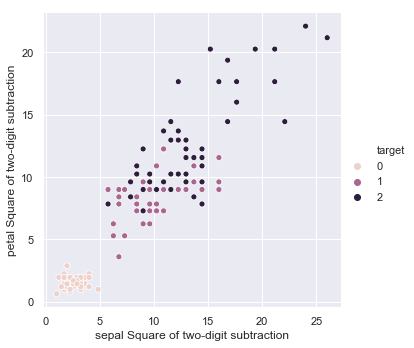

In [158]:
sns.relplot(x="sepal Square of two-digit subtraction", y="petal Square of two-digit subtraction", data=iris , hue="target")

## 把所有類別兩兩畫圖表示

C:\Users\strive72\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\strive72\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\strive72\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\strive72\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


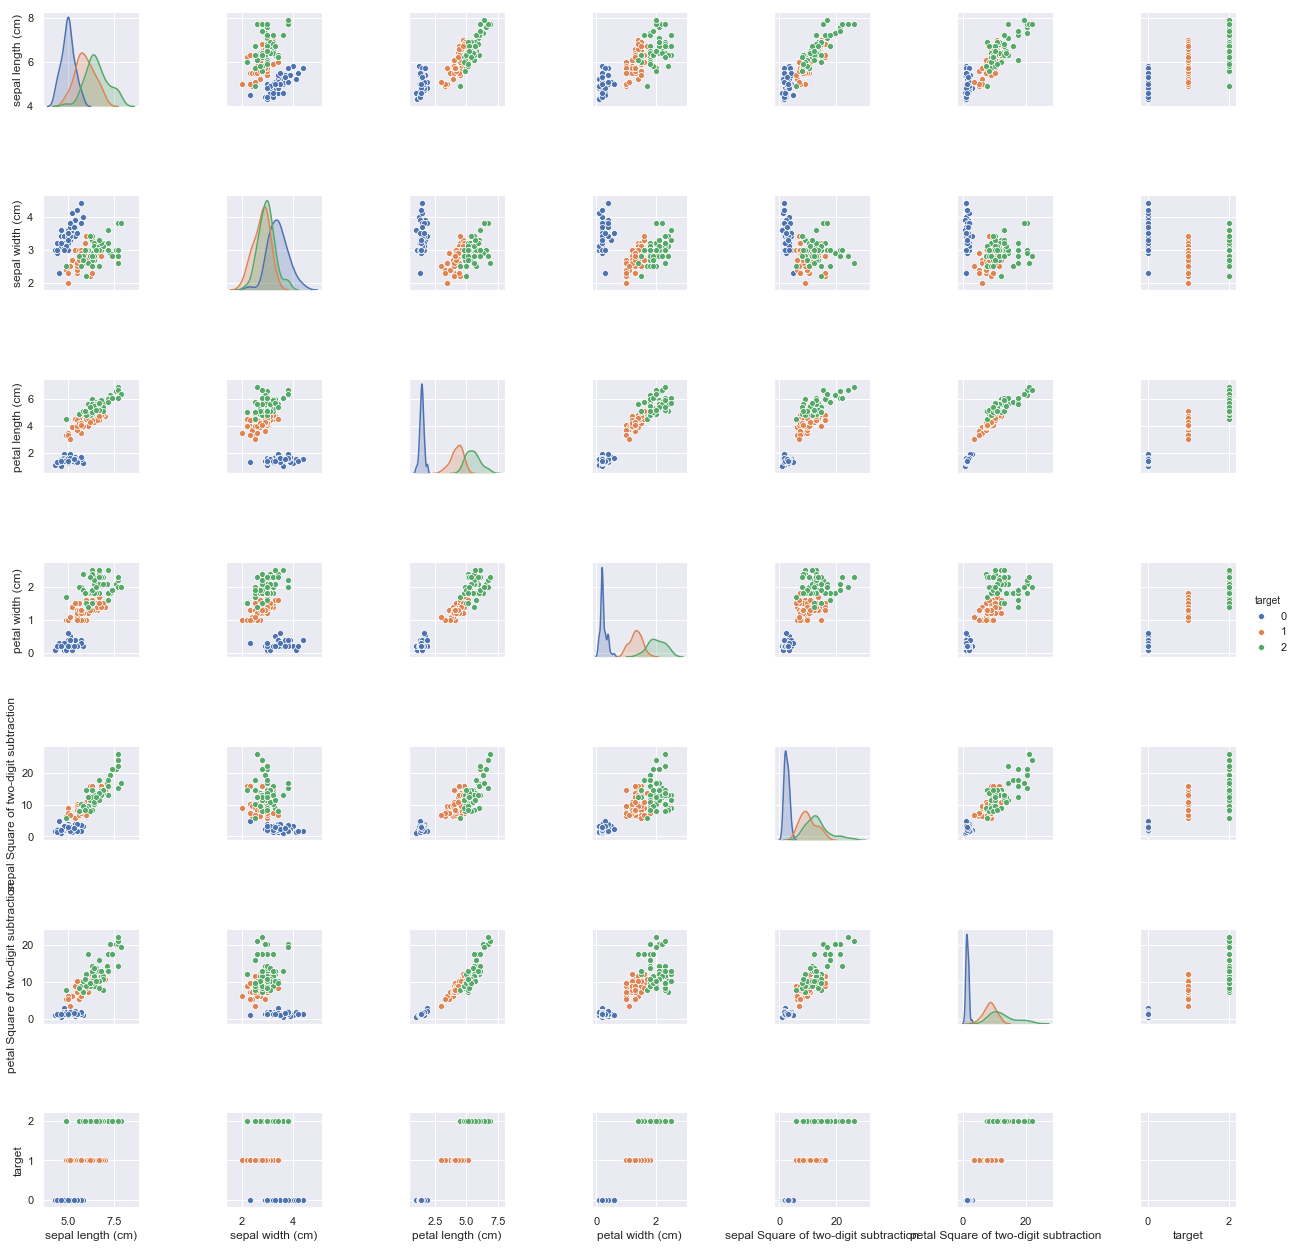

In [159]:
sns.pairplot(hue="target", data=iris.iloc[:, 0:])

# 選svm方法

In [168]:
from sklearn.svm import SVC, LinearSVC
X = iris.iloc[:, 0:5].values  # column 4="sepal Square of two-digit subtraction", column 5="petal Square of two-digit subtraction"
y = iris["target"].values
model = LinearSVC(random_state=555)
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

In [169]:
model.score(X=X, y=y)

0.9733333333333334

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

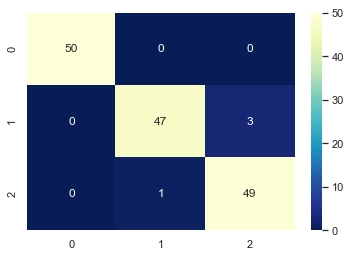

In [171]:
from sklearn import metrics
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

predict_y = model.predict(X=X)
confmat = metrics.confusion_matrix(y, predict_y)
confmat

# 結果 :跟原先同樣svm比較有優化預測的趨勢


# 創新解法2:


## 當我們拿到資料數據時候,可以快速先進行評估模型, 再從中挑選適當的模組
## 可藉由最佳的模組,作為二次優化或創新的方法解

# 1、對數據集進行分離（分為訓練集、驗證集等）

# 2、採用10倍交叉驗證設置測試機制

# 3、根據鳶尾花測量維度搆建6種不同模型來預測其種類

# 4、選擇最佳模型

# 建立驗證數據集

##   建立驗證數據集的目的:是尋找我們所建立的模型中最優者，因此我們需要一部分與機器學習算法獨立的數據集，用統計方法對這部分未知數據進行評估，以判斷我們使用的估計模型的準確性，我們將把加載的數據集分為兩部分，其中80％將用於訓練我們的模型，20％將被用作驗證數據集。

In [137]:
#  X_train and Y_train           训练集，
#  X_validation and Y_validation 验证集。

array = dataset.values #将数据库转换成数组形式
X = array[:,0:4] #取前四列，即属性数值
Y = array[:,4] #取最后一列，种类
validation_size = 0.20 #验证集规模
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed) #分割数据集

# 5.2 測試機制

# 採用10倍交叉驗證來評估模型的准確性。通過把我們的數據集分為10份，其中9份用於訓練，1份用於驗證，并重復訓練分組的所有組合。
# 我們設置scoring變量對所搆建的每個模型進行評估，其中accuracy用以評估模型的一個度量值，它等於模型正確預測實際數據的數量/數據集中所有數據總數，這一比率乘以100%（比如95%的精確度）。

In [138]:
# Test options and evaluation metric
seed = 9
scoring = 'accuracy'

# 5.3 建構模型
## 在不知道哪種算法最好的條件下，根據圖形可以看到某些類在某些方面是部分可線性分離的，
## 在這里釆用6種算法：邏輯回歸（LR）、線性判別分析（LDA）、K最近鄰（KNN）、分類和回歸樹（CART）、高斯朴素貝葉斯（NB）、支持向量機（SVM）。這里綜合了簡單線性（LR和LDA），非線性（KNN，CART，NB和SVM）算法，我們在每次運行之前重置隨機數種子，以確保使用完全相同的數據隔離來執行每個算法的評估，以確保結果直接可以比較。

In [172]:
# Spot Check Algorithms
models = [] #建立列表
models.append(('LR', LogisticRegression())) #往maodels添加元组（算法名称，算法函数）
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models: #将算法名称与函数分别读取
	kfold = model_selection.KFold(n_splits=10, random_state=seed) #建立10倍交叉验证
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) #每一个算法模型作为其中的参数，计算每一模型的精度得分
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
	print(msg) 

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# 5.4 選擇最優模型

## 通過運行，得到每個模型的評估精度：

## 可以看到knn的估計精度最高，括號內為估計結果的標準誤差。

## 我們還可以繪制模型評估結果的圖形，比較每個模型的差異和平均精度。
## 每個算法有一個精確度量的群體，因為每個算法被評估10次（10次交叉驗證）。
## 算法比較的箱形圖，可以看到每個算法精度的上沿基本貼着1，表明模型估計精度較高。

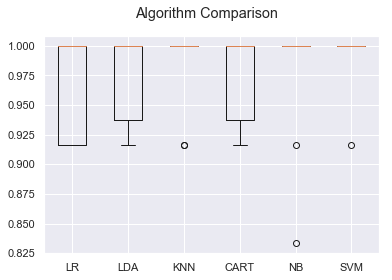

In [140]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6、預測
## 在得到KNN算法為測試中最佳模型的基礎上，現在我們想了解驗證集上模型的准確性。我們將對該算法進行獨立性的終極檢驗，在這里設置驗證集的作用體現出來了，以防止訓練過程中的失誤，比如訓練集體過度擬合或者數據遺漏，兩者都將導致過於樂觀的結果。
## 我們可以直接在驗證集上運行KNN模型，并將結果總結為最終准確度得分，混淆矩陣和分類報告。我們可以看到准確度是0.9或90％。 混淆矩陣提供了三個錯誤的指示。 最后，分類報告通過精確度，召回率，f1得分和支持顯示出優異的結果（授予驗證數據集很小）提供每個類別的細目。

# （混淆矩陣每一行代表實際類別，每一列代表預測的類別，因此有三個類別，第一行表明類別1的7個被全部預測准確，第二行類別2的12個有11個預測准確，另一個被預測到了類3中；第三行則是11個有9個預測准確，2個杯預測到了類別2，基於此，下邊就計算了分類預測精度的報告）

In [144]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train) #knn拟合序列集
predictions = knn.predict(X_validation) #预测验证集
print(accuracy_score(Y_validation, predictions)) #验证集精度得分

print(confusion_matrix(Y_validation, predictions)) #混淆矩阵
print(classification_report(Y_validation, predictions)) #分类预测报告

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

